<a href="https://colab.research.google.com/github/anikarajvanshi20/Projects_Portfolio/blob/main/Machine_Learning/Linear_Regression_Walmart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task: Time Series Forecasting with Linear Regression

Your goal is to build a simple **linear regression model** for forecasting, using the provided dataset. Follow the steps below to complete the task:

---

### Steps:

1. **Preprocess the Data**

   * Remove any columns that are not useful for modeling.
   * Add a feature indicating the **type of holiday**, if applicable.
   * Normalize or scale the features as needed.

2. **Split the Data**

   * Perform a random **80:20 split** into training and testing sets.

3. **Build and Train the Model**

   * Use **Linear Regression** to model the data.
   * You can use any framework you're comfortable with — e.g., `NumPy`, `scikit-learn`, or `PyTorch`.

4. **Evaluate the Model**

   * Report the following metrics on the test set:

     * **Mean Absolute Error (MAE)**
     * **Root Mean Squared Error (RMSE)**

5. **Visualize the Results**

   * Create relevant plots to illustrate the model's performance (e.g., predicted vs actual, residuals, etc.).


## Task: Predict Weekly Sales at a Walmart Store Using Linear Regression

In this task, you will build a **linear regression model** to predict **weekly sales** for Walmart stores using historical data.

### Dataset Overview

You are provided with a CSV file named **`Walmart_Store_sales.csv`**, containing weekly sales data from **February 5, 2010** to **November 1, 2012**. The dataset includes the following columns:

1. **Store** — Store ID number
2. **Date** — Week of the sales
3. **Weekly\_Sales** — Weekly sales amount for the given store
4. **Holiday\_Flag** — Whether the week included a major holiday

   * `1` = Holiday week
   * `0` = Non-holiday week
5. **Temperature** — Temperature on the day of sale
6. **Fuel\_Price** — Cost of fuel in the region
7. **CPI** — Consumer Price Index
8. **Unemployment** — Unemployment rate in the region

---

### Task Objectives

1. **Preprocess the Data**

   * Clean and normalize the dataset.
   * Remove or transform columns as needed.
   * Add a new feature to identify **specific holidays**, based on the dates provided below.

2. **Holiday Mapping**
   You can use the following dates to add a new column that labels the holiday type:

   * **Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
   * **Labour Day**: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
   * **Thanksgiving**: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
   * **Christmas**: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

3. **Split the Dataset**

   * Use an 80:20 split for training and testing.

4. **Train a Linear Regression Model**

   * You can implement the model using `NumPy`, `scikit-learn`, or `PyTorch`.

5. **Evaluate Model Performance**

   * Report the following metrics:

     * **Mean Absolute Error (MAE)**
     * **Root Mean Squared Error (RMSE)**

6. **Visualize the Results**

   * Plot predicted vs. actual weekly sales.
   * Optionally, visualize performance across different holidays or stores.


In [ ]:
from IPython.display import clear_output

In [ ]:
# Incase you run this notebook outside colab (where the libraries aren't already pre-installed)

%pip install gdown==4.5
%pip install pandas
%pip install numpy

clear_output()

In [ ]:
# Download the CSV file.
# !gdown 1UjuHkxE8VSQOdklibKqZ72qodJLBynEv

In [ ]:
# Install the opendatasets library
%pip install opendatasets -qq

clear_output()


## NOTE: You'll be asked to insert your 'Kaggle-username' and 'key'.
 To get your `Kaggle username` and `key`:
 1. Go to **Kaggle.com**,
 2. log in (or create a new account if you haven't),
 3. click on your **profile picture**, then "**Account**".
 4. Scroll down to the "**API**" section and click "**Create New API Token**".
 5. This will download a **kaggle.json** file containing your `username` and `key`.
 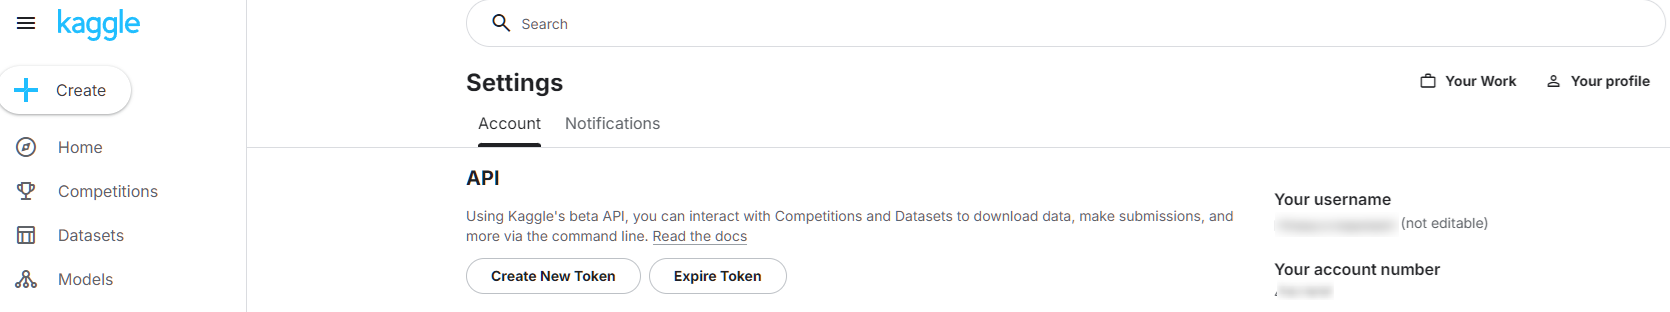



In [ ]:
import opendatasets as od

# Download the dataset
od.download("https://www.kaggle.com/datasets/yasserh/walmart-dataset")

Skipping, found downloaded files in "./walmart-dataset" (use force=True to force download)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_df = pd.read_csv('walmart-dataset/Walmart.csv')

In [ ]:
data_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data_y = data_df['Weekly_Sales'] # target
data_x = data_df.drop(['Weekly_Sales'], axis=1) # input features

In [ ]:
data_x.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,0,46.50,2.625,211.350143,8.106


In [ ]:
data_y

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68
...,...
6430,713173.95
6431,733455.07
6432,734464.36
6433,718125.53


In [ ]:
desc = data_x.describe()
desc

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
data_x.iloc[:140].describe()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,140.0,140.000000,140.000000,140.000000,140.000000,140.000000
mean,1.0,0.071429,68.341071,3.212257,215.837888,7.632650
std,0.0,0.258464,14.396135,0.428763,4.257347,0.355971
min,1.0,0.000000,35.400000,2.514000,210.337426,6.573000
25%,1.0,0.000000,57.682500,2.753000,211.529051,7.348000
50%,1.0,0.000000,69.865000,3.287000,215.391694,7.787000
75%,1.0,0.000000,80.540000,3.579750,220.195306,7.845000
max,1.0,1.000000,91.650000,3.907000,223.181477,8.106000


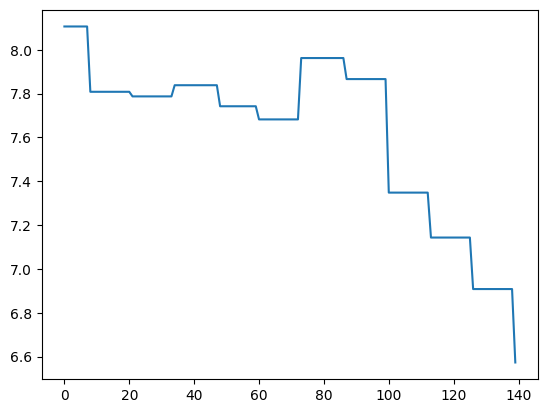

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data_x["Unemployment"].iloc[:140])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Adding Holiday_Type column
holiday_map = {'Super Bowl': ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08'],
    'Labour Day': ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'],
    'Thanksgiving': ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29'],
    'Christmas': ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']}

data_df['Date'] = pd.to_datetime(data_df['Date'], dayfirst=True)

data_df['Holiday_Type'] = 'None'
for holiday, dates in holiday_map.items():
    for date in dates:
        data_df.loc[data_df['Date'] == pd.to_datetime(date), 'Holiday_Type'] = holiday

# Defining features and target
features = ["Store", "Date", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment", "Holiday_Type"]
data_x = data_df[features]
data_y = data_df["Weekly_Sales"]

data_x

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Type
0,1,2010-02-05,0,42.31,2.572,211.096358,8.106,None
1,1,2010-02-12,1,38.51,2.548,211.242170,8.106,Super Bowl
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,None
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,None
4,1,2010-03-05,0,46.50,2.625,211.350143,8.106,None
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,0,64.88,3.997,192.013558,8.684,None
6431,45,2012-10-05,0,64.89,3.985,192.170412,8.667,None
6432,45,2012-10-12,0,54.47,4.000,192.327265,8.667,None
6433,45,2012-10-19,0,56.47,3.969,192.330854,8.667,None


In [ ]:
#Dropping uncessary columns and normalising the data
data_df['Holiday_Type'] = data_df['Holiday_Type'].replace(['Super Bowl', 'Labour Day', 'Thanksgiving', 'Christmas', 'None'], [1, 2, 3, 4, 0])
data_x = data_df.drop(['Date', 'Holiday_Flag','Weekly_Sales'], axis=1)
print(data_x)
x = data_x[["Store", "Temperature", "Fuel_Price", "CPI", "Unemployment", "Holiday_Type"]].apply(lambda x: (x-x.min())/(x.max()-x.min())).to_numpy()
y = data_y.to_numpy()
y_max = np.max(y)
y_min = np.min(y)
y_fin = (y-y_min)/(y_max-y_min)

      Store  Temperature  Fuel_Price         CPI  Unemployment  Holiday_Type
0         1        42.31       2.572  211.096358         8.106             0
1         1        38.51       2.548  211.242170         8.106             1
2         1        39.93       2.514  211.289143         8.106             0
3         1        46.63       2.561  211.319643         8.106             0
4         1        46.50       2.625  211.350143         8.106             0
...     ...          ...         ...         ...           ...           ...
6430     45        64.88       3.997  192.013558         8.684             0
6431     45        64.89       3.985  192.170412         8.667             0
6432     45        54.47       4.000  192.327265         8.667             0
6433     45        56.47       3.969  192.330854         8.667             0
6434     45        58.85       3.882  192.308899         8.667             0

[6435 rows x 6 columns]


/tmp/ipython-input-49-3502738057.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df['Holiday_Type'] = data_df['Holiday_Type'].replace(['Super Bowl', 'Labour Day', 'Thanksgiving', 'Christmas', 'None'], [1, 2, 3, 4, 0])


In [ ]:
# Checking for missing values
missing_values = data_x.isnull().sum()
print("Missing values per column in data_x:")
print(missing_values)

Missing values per column in data_x:
Store           0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Holiday_Type    0
dtype: int64


In [ ]:
#80-20 split for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_fin, test_size = 0.2, random_state = 42)
print(x_train)
print(y_train.shape)

[[0.15909091 0.75714286 0.05511022 0.87788478 0.23346751 0.        ]
 [0.13636364 0.22270059 0.4509018  0.65232047 0.47335634 0.        ]
 [0.93181818 0.61937378 0.32965932 0.00476591 0.49108683 0.        ]
 ...
 [0.81818182 0.868591   0.60721443 0.87213932 0.41192256 0.        ]
 [0.84090909 0.45694716 0.47895792 0.03960739 0.86361894 1.        ]
 [0.13636364 0.28708415 0.03907816 0.62736827 0.49214108 0.        ]]
(5148,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Running the Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R² Score: 0.1474
Root Mean Squared Error (RMSE): 0.1452
Mean Absolute Error (MAE): 0.1201


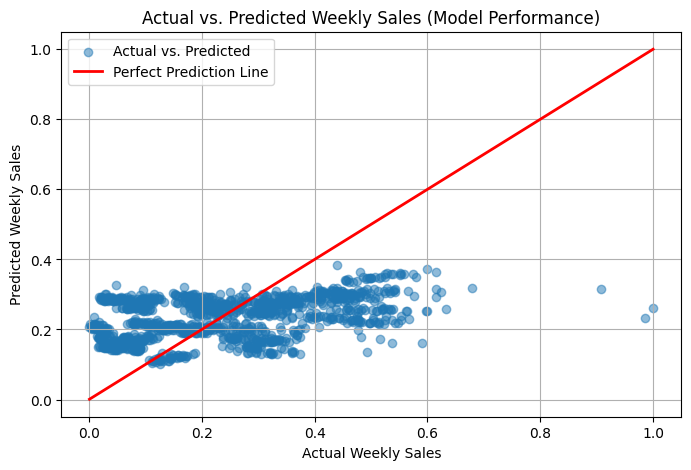

R² Score: 0.1474
Root Mean Squared Error (RMSE): 0.1452
Mean Absolute Error (MAE): 0.1201


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the normalized test set
y_pred = model.predict(x_test)

# Plot actual vs. predicted sales
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs. Predicted')

# Add the line of perfect prediction (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2, label='Perfect Prediction Line')


plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs. Predicted Weekly Sales (Model Performance)")
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Second Aprroach
df = pd.read_csv("walmart-dataset/Walmart.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Adding specific holiday types
holiday_map = {'Super Bowl': ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08'],
    'Labour Day': ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'],
    'Thanksgiving': ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29'],
    'Christmas': ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']}

df['Holiday_Type'] = 'None'
for holiday, dates in holiday_map.items():
    for d in dates:
        df.loc[df['Date'] == pd.to_datetime(d), 'Holiday_Type'] = holiday

# Extracting time-based features
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Defining target and features
target = 'Weekly_Sales'
features = ['Store', 'Holiday_Flag', 'Temperature', 'CPI', 'Unemployment',
            'Holiday_Type', 'Month', 'Year']

X = df[features].copy()
y = df[target].copy()
X

,Store,Holiday_Flag,Temperature,CPI,Unemployment,Holiday_Type,Month,Year
0,1,0,42.31,211.096358,8.106,None,2,2010
1,1,1,38.51,211.242170,8.106,Super Bowl,2,2010
2,1,0,39.93,211.289143,8.106,None,2,2010
3,1,0,46.63,211.319643,8.106,None,2,2010
4,1,0,46.50,211.350143,8.106,None,3,2010
...,...,...,...,...,...,...,...,...
6430,45,0,64.88,192.013558,8.684,None,9,2012
6431,45,0,64.89,192.170412,8.667,None,10,2012
6432,45,0,54.47,192.327265,8.667,None,10,2012
6433,45,0,56.47,192.330854,8.667,None,10,2012


In [ ]:
# Normalizing and hot encoding categorical features
scaler = MinMaxScaler()
X[['Temperature', 'CPI', 'Unemployment']] = scaler.fit_transform(X[['Temperature', 'CPI', 'Unemployment']])

categorical_cols = ['Store', 'Holiday_Type', 'Month', 'Year']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X = X.drop(['Holiday_Flag'], axis=1)
print(X)

      Temperature       CPI  Unemployment  Store_2  Store_3  Store_4  Store_5  \
0        0.434149  0.840500      0.405118    False    False    False    False   
1        0.396967  0.841941      0.405118    False    False    False    False   
2        0.410861  0.842405      0.405118    False    False    False    False   
3        0.476419  0.842707      0.405118    False    False    False    False   
4        0.475147  0.843008      0.405118    False    False    False    False   
...           ...       ...           ...      ...      ...      ...      ...   
6430     0.654990  0.651876      0.460514    False    False    False    False   
6431     0.655088  0.653427      0.458884    False    False    False    False   
6432     0.553131  0.654977      0.458884    False    False    False    False   
6433     0.572701  0.655013      0.458884    False    False    False    False   
6434     0.595988  0.654796      0.458884    False    False    False    False   

      Store_6  Store_7  Sto

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing target
y_min = y_train.min()
y_max = y_train.max()
y_train_scaled = (y_train - y_min) / (y_max - y_min)
y_test_scaled = (y_test - y_min) / (y_max - y_min)

# Training model
model = LinearRegression()
model.fit(X_train, y_train_scaled)

y_pred_scaled = model.predict(X_test)
y_pred = y_pred_scaled * (y_max - y_min) + y_min  # Rescaling predictions

# Evaluation
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
r2 = r2_score(y_test_scaled, y_pred_scaled)

print(f"R² Score: {r2:.4f}")
print(f"MAE:      {mae:.4f}")
print(f"RMSE:     {rmse:.4f}")

R² Score: 0.9477
MAE:      0.0226
RMSE:     0.0367


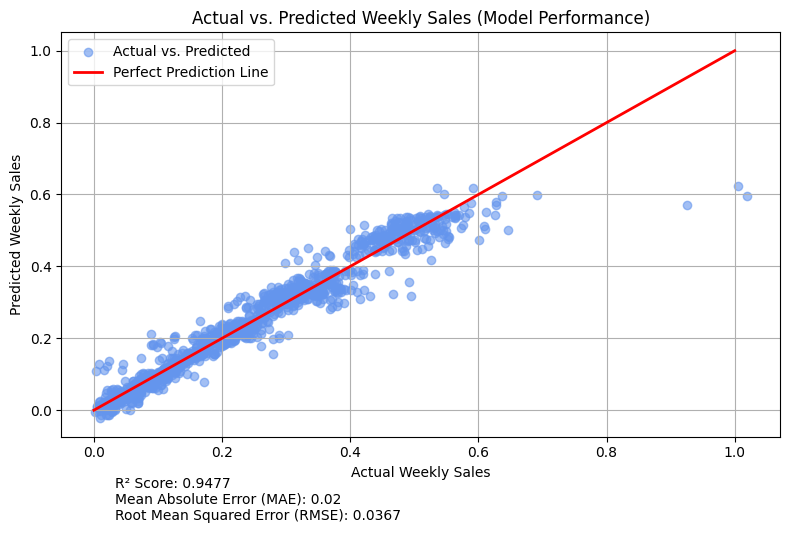

In [ ]:
# Plotting
plt.figure(figsize=(8,5))
plt.scatter(y_test_scaled, y_pred_scaled, color='cornflowerblue', label='Actual vs. Predicted', alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', label='Perfect Prediction Line', linewidth=2)

plt.title('Actual vs. Predicted Weekly Sales (Model Performance)')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.legend()
plt.grid(True)

# Adding metrics
plt.figtext(0.15, -0.05, f"R² Score: {r2:.4f}\nMean Absolute Error (MAE): {mae:.2f}\nRoot Mean Squared Error (RMSE): {rmse:.4f}", fontsize=10)

plt.tight_layout()
plt.show()


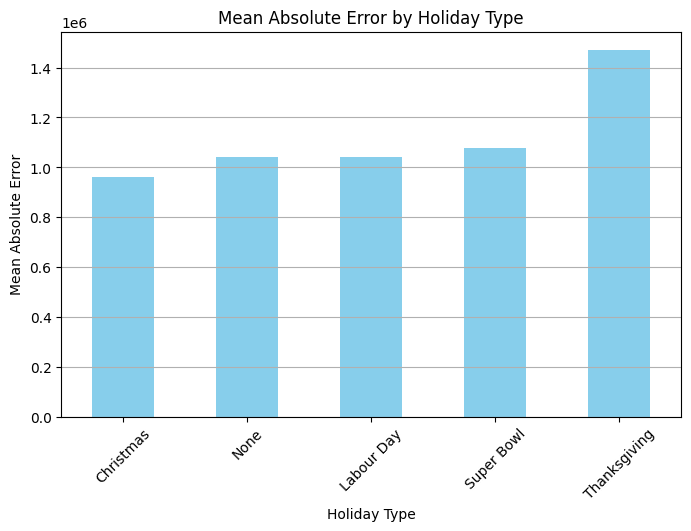

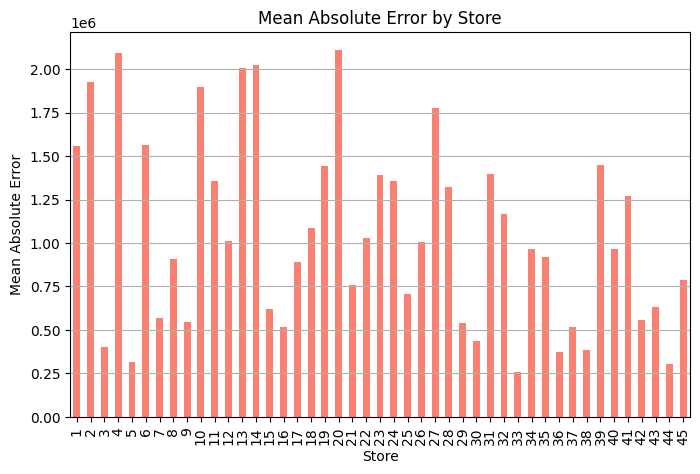

In [ ]:
# Geting the predictions for the entire dataset
all_predictions = model.predict(X)

# Creating a new dataframe with actuals, predictions, and original features
results_df = df.copy()
results_df['Predicted_Sales'] = all_predictions
results_df['Absolute_Error'] = np.abs(results_df['Weekly_Sales'] - results_df['Predicted_Sales'])

# Visualize performance by Holiday
holiday_performance = results_df.groupby('Holiday_Type')['Absolute_Error'].mean().sort_values()
plt.figure(figsize=(8, 5))
holiday_performance.plot(kind='bar', color='skyblue')
plt.title('Mean Absolute Error by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Visualize performance by Store
store_performance = results_df.groupby('Store')['Absolute_Error'].mean().sort_index()
plt.figure(figsize=(8, 5))
store_performance.plot(kind='bar', color='salmon')
plt.title('Mean Absolute Error by Store')
plt.xlabel('Store')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()